In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/susmitvengurlekar/opt/miniconda3/lib/pyth

In [127]:
df = pd.read_csv("../raw_data/train.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [128]:
df = df.drop("ID",axis=1)

In [14]:
for c in df.columns:
    print(f"Column: {c}")
    print(f"No of unique labels: {len(df[c].unique())}")
    print(df[c].value_counts()/len(df)*100)

Column: Agency
No of unique labels: 16
EPX    50.120436
C2B    20.292487
CWT    13.024278
JZI     8.830052
LWC     1.540814
SSI     1.491111
JWT     1.051424
RAB     1.007456
TST     0.753202
KML     0.598356
ART     0.426305
CCR     0.298222
TTW     0.198815
CBH     0.145288
CSR     0.114701
ADM     0.107054
Name: Agency, dtype: float64
Column: Agency Type
No of unique labels: 2
Travel Agency    66.901166
Airlines         33.098834
Name: Agency Type, dtype: float64
Column: Distribution Channel
No of unique labels: 2
Online     98.296693
Offline     1.703307
Name: Distribution Channel, dtype: float64
Column: Product Name
No of unique labels: 25
Cancellation Plan                       25.337412
2 way Comprehensive Plan                20.177786
Rental Vehicle Excess Insurance         13.024278
Bronze Plan                              9.028866
Basic Plan                               7.727012
Silver Plan                              5.471229
1 way Comprehensive Plan                 4.6052

In [15]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

In [31]:
agency_top = df.groupby(["Agency"])["Claim"].mean().sort_values(ascending=False)[:5].index
agency_map = {j:i for i,j in enumerate(agency_top,1)}
agency_mapping = {}
for unique in df["Agency"].unique():
    if unique in agency_map:
        agency_mapping[unique] = agency_map.get(unique)
    else:
        agency_mapping[unique] = 6

In [32]:
df["Agency"] = df["Agency"].map(agency_mapping)

In [34]:
df.groupby(["Product Name"])["Claim"].mean().sort_values(ascending=False)

Product Name
Annual Travel Protect Gold              0.655738
Annual Silver Plan                      0.617973
Annual Gold Plan                        0.583051
Single Trip Travel Protect Platinum     0.500000
Silver Plan                             0.483578
Single Trip Travel Protect Gold         0.482072
Individual Comprehensive Plan           0.440476
Bronze Plan                             0.427694
Gold Plan                               0.376316
Annual Travel Protect Silver            0.336957
Annual Travel Protect Platinum          0.280000
2 way Comprehensive Plan                0.138039
Rental Vehicle Excess Insurance         0.124468
Single Trip Travel Protect Silver       0.123077
Spouse or Parents Comprehensive Plan    0.083333
Ticket Protector                        0.073077
Basic Plan                              0.060861
Travel Cruise Protect                   0.053299
Value Plan                              0.047935
Comprehensive Plan                      0.043165
1 way C

In [35]:
def is_premium_plan(plan):
    parts = plan.split(" ")
    identifiers = ["Gold","Silver","Platinum","Bronze"]
    for part in parts:
        if part in identifiers:
            return 1
    return 0
    
df["Premium_Plan"] = df["Product Name"].map(is_premium_plan)

In [36]:
prod_name_top = df.groupby(["Product Name"])["Claim"].mean().sort_values(ascending=False)[:10].index
prod_name_map = {j:i for i,j in enumerate(prod_name_top,1)}
prod_name_mappping = {}
for unique in df["Product Name"].unique():
    if unique in prod_name_map:
        prod_name_mappping[unique] = prod_name_map.get(unique)
    else:
        prod_name_mappping[unique] = 11

In [38]:
df["Product Name"] = df["Product Name"].map(prod_name_mappping)

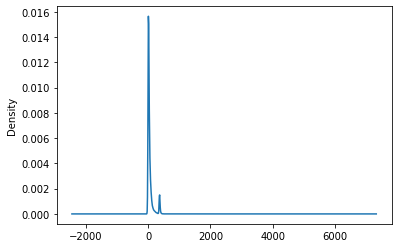

In [41]:
df["Duration"].plot(kind="kde")

In [43]:
df["Duration"].describe()

count    52310.000000
mean        58.256108
std        109.138708
min         -2.000000
25%         10.000000
50%         24.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

In [51]:
df["Duration"].sort_values()[:10]

41424   -2
11523   -1
15949   -1
33398   -1
45657    0
35801    0
32526    0
14346    0
32489    0
22925    0
Name: Duration, dtype: int64

In [62]:
df["Duration"].sort_values(ascending=False)[:30]

47791    4881
14544    4847
22123    4844
7766     4831
31985    4815
48880    4784
382      4736
43158    4609
33701    4580
2609      740
3469      547
47724     545
32698     531
6017      529
21677     508
39662     508
49964     497
39351     494
7662      490
24738     488
28094     487
1628      474
44311     472
2465      466
35173     466
4978      465
40035     463
48674     459
8384      457
39222     457
Name: Duration, dtype: int64

In [104]:
df = df[df["Duration"]>0]
df = df.reset_index()

In [105]:
df["Duration"].describe()

count    52264.000000
mean        58.307477
std        109.172984
min          1.000000
25%         10.000000
50%         24.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

In [106]:
def get_duration_category(d):
    if d < 25:
        return "Short"
    elif d < 200:
        return "Medium"
    elif d < 750:
        return "Long"
    return "Very Long"

df["Duration_Category"] = df["Duration"].map(get_duration_category)

In [107]:
df.groupby(["Duration_Category"])["Duration","Claim"].mean()

/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Duration,Claim
Duration_Category,,
Long,347.095684,0.499740
Medium,62.517360,0.154745
Short,11.130203,0.128498
Very Long,4769.666667,0.000000


In [123]:
for dur_cat in ["Short","Medium","Long","Very Long"]:
    subset = df[df["Duration_Category"] == dur_cat]
    X = subset["Duration"]
    mean = X.mean()
    std = X.std()
    dur = (X-mean)/std
    df.loc[subset.index,"Duration"] = dur

In [124]:
duration_category_mapper = {
    "Long" : 3,
    "Medium" : 2,
    "Short" : 1,
    "Very Long": 4
}

df["Duration_Category"] = df["Duration_Category"].map(duration_category_mapper)

In [125]:
df["Duration_Time_Cat"] = df["Duration"]**2 * df["Duration_Category"]

In [126]:
df.columns

Index(['index', 'Agency', 'Agency Type', 'Distribution Channel',
       'Product Name', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim', 'Premium_Plan',
       'Duration_Category', 'Duration_Time_Cat'],
      dtype='object')

In [137]:
dest_top = list(df["Destination"].value_counts()[:14].index)
dest_map = {j:i for i,j in enumerate(dest_top,1)}
dest_mapping = {}
for unique in df["Destination"].unique():
    if unique in dest_map:
        dest_mapping[unique] = dest_map.get(unique)
    else:
        dest_mapping[unique] = 15

In [139]:
df["Destination"] = df["Destination"].map(dest_mapping)

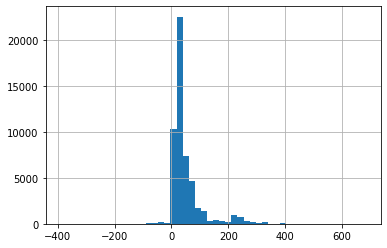

In [141]:
df["Net Sales"].hist(bins=50)

In [142]:
df["Net Sales"].describe()

count    52310.000000
mean        48.554673
std         60.198589
min       -389.000000
25%         19.800000
50%         29.500000
75%         55.000000
max        682.000000
Name: Net Sales, dtype: float64

In [143]:
df = df[df["Net Sales"] >= 0]
df = df.reset_index()

In [144]:
df["Net Sales"].describe()

count    51807.000000
mean        49.597162
std         59.323558
min          0.000000
25%         20.000000
50%         29.700000
75%         56.000000
max        682.000000
Name: Net Sales, dtype: float64

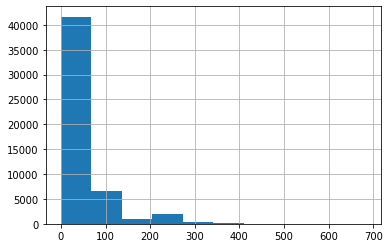

In [147]:
df["Net Sales"].hist()

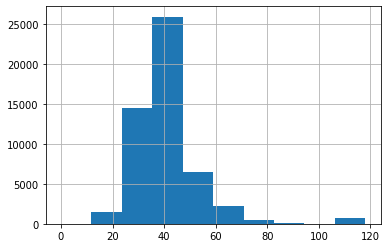

In [148]:
df["Age"].hist()

In [149]:
df["Age"].describe()

count    51807.000000
mean        39.548748
std         13.748462
min          0.000000
25%         33.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

In [153]:
df[df["Age"]>100]

,index,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
46,46,JWT,Airlines,Online,Value Plan,49,11,31.0,12.40,118,0
88,88,JWT,Airlines,Online,Value Plan,22,11,50.0,20.00,118,0
108,109,JWT,Airlines,Online,Value Plan,46,11,31.0,12.40,118,0
131,132,JWT,Airlines,Online,Value Plan,89,11,117.0,46.80,118,0
154,156,JWT,Airlines,Online,Value Plan,68,11,180.0,72.00,118,0
...,...,...,...,...,...,...,...,...,...,...,...
51550,52049,JWT,Airlines,Online,Value Plan,3,11,31.0,12.40,118,0
51579,52078,JWT,Airlines,Online,Value Plan,4,11,31.0,12.40,118,0
51706,52208,JWT,Airlines,Online,Value Plan,9,11,31.0,12.40,118,0
51711,52213,JZI,Airlines,Online,Value Plan,70,7,0.0,25.55,118,0


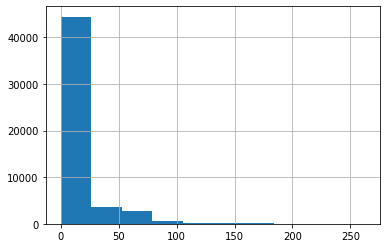

In [154]:
df["Commision (in value)"].hist()

In [155]:
df.corr()

,index,Duration,Destination,Net Sales,Commision (in value),Age,Claim
index,1.000000,-0.003951,0.001016,-0.003228,-0.000692,-0.001684,0.001676
Duration,-0.003951,1.000000,-0.107750,0.615220,0.485056,-0.003668,0.203421
Destination,0.001016,-0.107750,1.000000,-0.106180,-0.069468,0.053530,-0.231219
Net Sales,-0.003228,0.615220,-0.106180,1.000000,0.769371,0.023739,0.326780
Commision (in value),-0.000692,0.485056,-0.069468,0.769371,1.000000,0.087905,0.263561
Age,-0.001684,-0.003668,0.053530,0.023739,0.087905,1.000000,-0.060716
Claim,0.001676,0.203421,-0.231219,0.326780,0.263561,-0.060716,1.000000


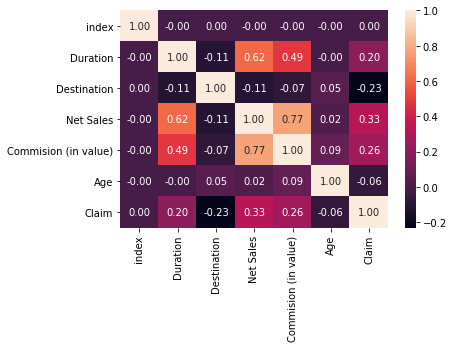

In [160]:
sns.heatmap(df.corr(),annot=True,cmap="rocket",fmt="0.2f")

In [166]:
df.groupby(["Claim"])["Commision (in value)","Net Sales","Age"].agg(["mean"])

/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Commision (in value),Net Sales,Age
,mean,mean,mean
Claim,,,
0,9.413622,40.88584,39.923857
1,25.475816,92.73642,37.691176
